# Projet de Phase 1 – Analyse des Risques d'Avions

## Objectif
Ce projet vise à identifier les modèles d’avions les moins risqués à partir des données d’accidents de la NTSB.

## Méthodologie
- Nettoyage des données
- Analyse des blessures par phase de vol, météo et constructeur
- Recommandations stratégiques

## Recommandations
1. Éviter les phases critiques comme l'approche
2. Privilégier certains fabricants
3. Renforcer la préparation en météo IMC

## Réalisé par
**Amee Hashley JEUDY**

In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\jeudy\\OneDrive\\Documents\\Data Science\\AviationData.csv", encoding='latin1',low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [2]:
# voir les colonnes disponibles
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [3]:
#Verification des valeurs manquantes
# Afficher le pourcentage de valeurs manquantes par colonne
missing = df.isnull().mean().sort_values(ascending=False) * 100
missing[missing > 0]

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.601570
Airport.Name              40.708074
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.982990
Report.Status              7.181991
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.554748
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
dtype: float64

In [4]:
# Liste des colonnes qu'on veut convertir en numérique
cols_to_convert = [
    "Total.Fatal.Injuries",
    "Total.Serious.Injuries",
    "Total.Minor.Injuries",
    "Total.Uninjured"
]

# Vérifier que ces colonnes existent avant de les convertir
for col in cols_to_convert:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    else:
        print(f"Colonne non trouvée : {col}")

In [5]:
# Conversion de Event.Date en format date
df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors="coerce")

In [6]:
# Vérifier les dates extrêmes
df["Event.Date"].min(), df["Event.Date"].max()

(Timestamp('1948-10-24 00:00:00'), Timestamp('2022-12-29 00:00:00'))

In [7]:
#Resume du tableau
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            52704 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [8]:
## COMMENCONS L'ANALYSE
#Quels sont les avions les moins risqués pour commencer une activité aérienne ?
colonnes_utiles = [
    "Event.Date", "Location", "Country", "Make", "Model",
    "Aircraft.Category", "Injury.Severity", "Aircraft.damage",
    "Total.Fatal.Injuries", "Weather.Condition", "Broad.phase.of.flight"
]

df = df[colonnes_utiles]
df.head()

,Event.Date,Location,Country,Make,Model,Aircraft.Category,Injury.Severity,Aircraft.damage,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight
0,1948-10-24,"MOOSE CREEK, ID",United States,Stinson,108-3,NaN,Fatal(2),Destroyed,2.0,UNK,Cruise
1,1962-07-19,"BRIDGEPORT, CA",United States,Piper,PA24-180,NaN,Fatal(4),Destroyed,4.0,UNK,Unknown
2,1974-08-30,"Saltville, VA",United States,Cessna,172M,NaN,Fatal(3),Destroyed,3.0,IMC,Cruise
3,1977-06-19,"EUREKA, CA",United States,Rockwell,112,NaN,Fatal(2),Destroyed,2.0,IMC,Cruise
4,1979-08-02,"Canton, OH",United States,Cessna,501,NaN,Fatal(1),Destroyed,1.0,VMC,Approach


In [9]:
#Quels modèles d’avions sont les plus meurtriers ?
#Regardons les 3 colonnes
df[["Make", "Model", "Total.Fatal.Injuries"]].head(10)

,Make,Model,Total.Fatal.Injuries
0,Stinson,108-3,2.0
1,Piper,PA24-180,4.0
2,Cessna,172M,3.0
3,Rockwell,112,2.0
4,Cessna,501,1.0
5,Mcdonnell Douglas,DC9,NaN
6,Cessna,180,4.0
7,Cessna,140,0.0
8,Cessna,401B,0.0
9,North American,NAVION L-17B,0.0


In [10]:
#Supprimons les lignes sans nombre de morts
# Supprimons les lignes où Total.Fatal.Injuries est vide
df_q1 = df.dropna(subset=["Total.Fatal.Injuries"])


In [11]:
# Calculons le total de morts par modèle d’avion
mort_par_modele = df_q1.groupby("Model")["Total.Fatal.Injuries"].sum()
mort_par_modele

Model
&GCBC                   0.0
(EX) RV-6               2.0
(MODIFIED)              1.0
(SOLOY CONVERSION)      0.0
-737-222              123.0
                      ...  
kit                     0.0
lebed                   2.0
none                    1.0
unk                     0.0
unknown                 1.0
Name: Total.Fatal.Injuries, Length: 11086, dtype: float64

In [12]:
# Trier du plus meurtrier au moins
top_10_modeles_dangereux = mort_par_modele.sort_values(ascending=False).head(10)

# Afficher
top_10_modeles_dangereux

Model
737          1348.0
737-200       906.0
777 - 206     534.0
A320          513.0
MD-82         439.0
172N          430.0
172           400.0
DC-9-32       396.0
152           392.0
PA-28-181     381.0
Name: Total.Fatal.Injuries, dtype: float64

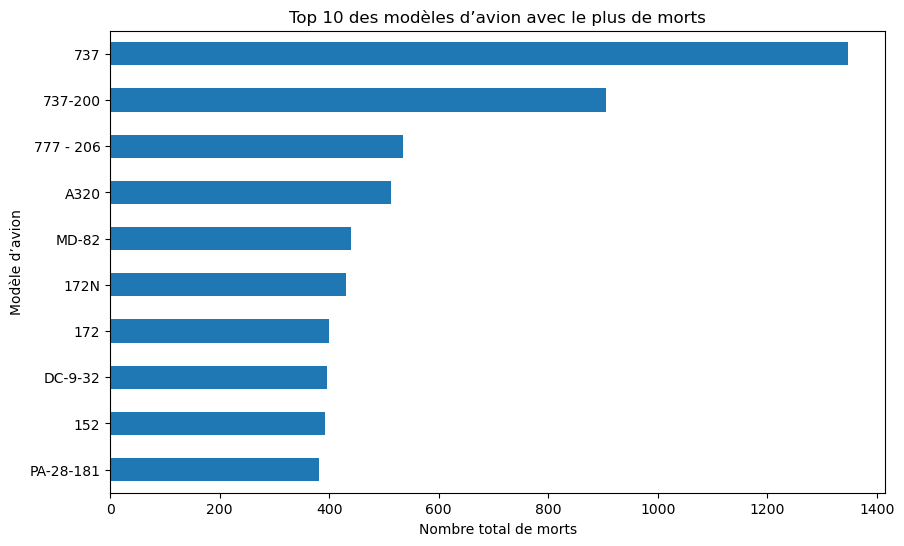

In [13]:
#Visualiser avec un graphique simple
import matplotlib.pyplot as plt

top_10_modeles_dangereux.plot(kind="barh", figsize=(10,6))
plt.title("Top 10 des modèles d’avion avec le plus de morts")
plt.xlabel("Nombre total de morts")
plt.ylabel("Modèle d’avion")
plt.gca().invert_yaxis()  # Pour avoir le + élevé en haut
plt.show()

In [14]:
#Quelles phases de vol sont les plus dangereuses ?
#Regardons les colonnes
df[["Broad.phase.of.flight", "Total.Fatal.Injuries"]].head(10)


,Broad.phase.of.flight,Total.Fatal.Injuries
0,Cruise,2.0
1,Unknown,4.0
2,Cruise,3.0
3,Cruise,2.0
4,Approach,1.0
5,Climb,NaN
6,Unknown,4.0
7,Takeoff,0.0
8,Landing,0.0
9,Cruise,0.0


In [15]:
#nettoyons les donnees
df_q2 = df.dropna(subset=["Broad.phase.of.flight", "Total.Fatal.Injuries"])
df_q2

,Event.Date,Location,Country,Make,Model,Aircraft.Category,Injury.Severity,Aircraft.damage,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight
0,1948-10-24,"MOOSE CREEK, ID",United States,Stinson,108-3,NaN,Fatal(2),Destroyed,2.0,UNK,Cruise
1,1962-07-19,"BRIDGEPORT, CA",United States,Piper,PA24-180,NaN,Fatal(4),Destroyed,4.0,UNK,Unknown
2,1974-08-30,"Saltville, VA",United States,Cessna,172M,NaN,Fatal(3),Destroyed,3.0,IMC,Cruise
3,1977-06-19,"EUREKA, CA",United States,Rockwell,112,NaN,Fatal(2),Destroyed,2.0,IMC,Cruise
4,1979-08-02,"Canton, OH",United States,Cessna,501,NaN,Fatal(1),Destroyed,1.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...
63900,2007-12-28,"MURRIETA, CA",United States,Hein,Sonex,Airplane,Non-Fatal,Substantial,0.0,VMC,Cruise
63906,2007-12-29,"Crowley, TX",United States,Althouse,RAF 2000 GTX,Gyrocraft,Fatal(2),Destroyed,2.0,VMC,Maneuvering
63907,2007-12-29,"Venice, LA",United States,Bell,206L1,Helicopter,Fatal(1),Destroyed,1.0,IMC,Approach
63908,2007-12-30,"CHEROKEE, AL",United States,Bell,206L-3,Helicopter,Fatal(3),Substantial,3.0,VMC,Maneuvering


In [16]:
#Regroupons et additionnons les morts
morts_par_phase = df_q2.groupby("Broad.phase.of.flight")["Total.Fatal.Injuries"].sum()
morts_par_phase

Broad.phase.of.flight
Approach       3842.0
Climb          1762.0
Cruise         6173.0
Descent         913.0
Go-around       587.0
Landing         518.0
Maneuvering    5323.0
Other            85.0
Standing        161.0
Takeoff        4304.0
Taxi            102.0
Unknown         749.0
Name: Total.Fatal.Injuries, dtype: float64

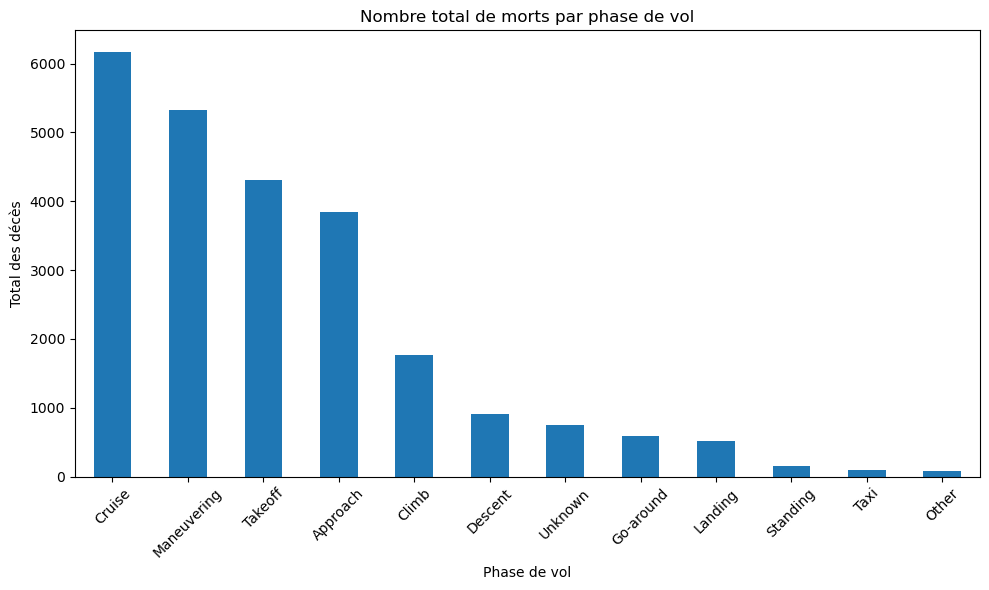

In [17]:
#Trions et affichons le graphique

morts_par_phase.sort_values(ascending=False).plot(kind="bar", figsize=(10,6))
plt.title("Nombre total de morts par phase de vol")
plt.xlabel("Phase de vol")
plt.ylabel("Total des décès")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
#Q3 : Est-ce que les conditions météo influencent la gravité des accidents ?
# Regardons les colonnes
df[["Weather.Condition", "Total.Fatal.Injuries"]].head(10)

,Weather.Condition,Total.Fatal.Injuries
0,UNK,2.0
1,UNK,4.0
2,IMC,3.0
3,IMC,2.0
4,VMC,1.0
5,VMC,NaN
6,IMC,4.0
7,VMC,0.0
8,IMC,0.0
9,IMC,0.0


In [19]:
#Supprimons les lignes vides
df_q3 = df.dropna(subset=["Weather.Condition", "Total.Fatal.Injuries"])

In [20]:
#Total de morts par condition météo
morts_par_meteo = df_q3.groupby("Weather.Condition")["Total.Fatal.Injuries"].sum()
morts_par_meteo

Weather.Condition
IMC    11824.0
UNK     2407.0
Unk      326.0
VMC    25558.0
Name: Total.Fatal.Injuries, dtype: float64

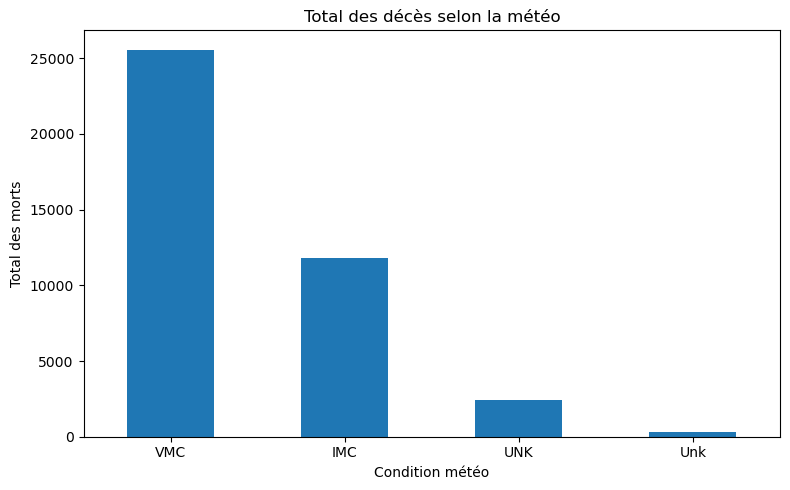

In [21]:
#Visualisation
morts_par_meteo.sort_values(ascending=False).plot(kind="bar", figsize=(8,5))
plt.title("Total des décès selon la météo")
plt.xlabel("Condition météo")
plt.ylabel("Total des morts")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

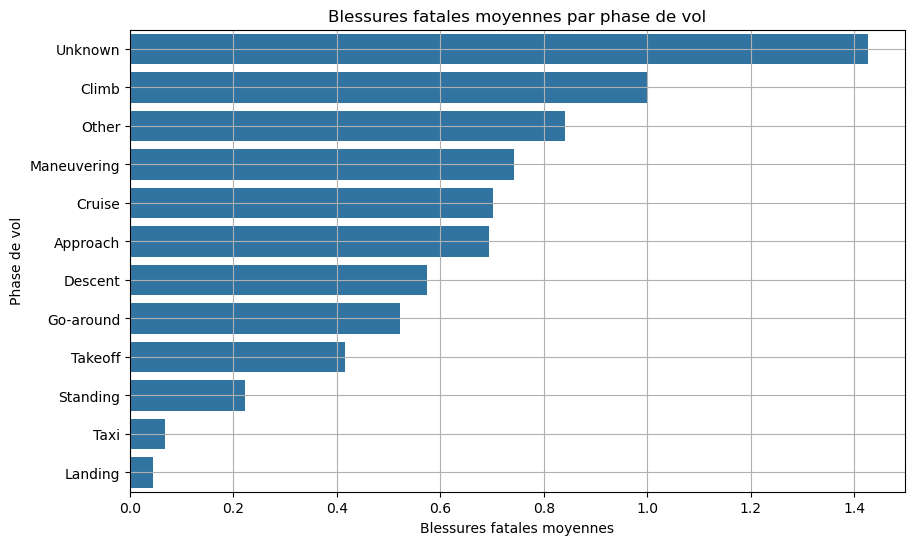

In [22]:
#Graphe des blessures moyennes par phase de vol
import matplotlib.pyplot as plt
import seaborn as sns

# Nettoyer les données
df_phase = df.dropna(subset=["Broad.phase.of.flight", "Total.Fatal.Injuries"]).copy()
df_phase["Total.Fatal.Injuries"] = pd.to_numeric(df_phase["Total.Fatal.Injuries"], errors="coerce")

# Moyenne des blessures par phase
phase_mean = df_phase.groupby("Broad.phase.of.flight")["Total.Fatal.Injuries"].mean().sort_values(ascending=False)

# Barplot
plt.figure(figsize=(10,6))
sns.barplot(x=phase_mean.values, y=phase_mean.index)
plt.title("Blessures fatales moyennes par phase de vol")
plt.xlabel("Blessures fatales moyennes")
plt.ylabel("Phase de vol")
plt.grid(True)
plt.show()

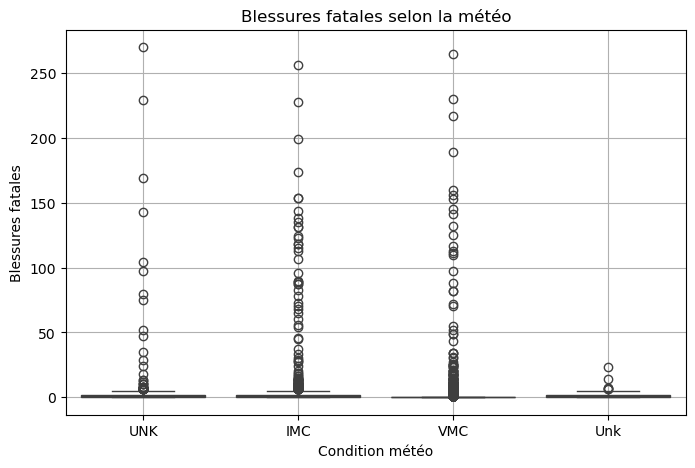

In [23]:
#Graphe des blessures fatales par condition meteo
df_weather = df.dropna(subset=["Weather.Condition", "Total.Fatal.Injuries"])
plt.figure(figsize=(8, 5))
sns.boxplot(x="Weather.Condition", y="Total.Fatal.Injuries", data=df_weather)
plt.title("Blessures fatales selon la météo")
plt.xlabel("Condition météo")
plt.ylabel("Blessures fatales")
plt.grid(True)
plt.show()